In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io.votable import parse

def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table()
    return table.to_pandas()

In [3]:
'''
multivariate gaussian fitting with numpy / correlation between pmra and pmdec goes to sigma
'''

class MultivariateNormal(object):
  def __init__(self):
    self.u_ = None
    self.sig_ = None
  @staticmethod
  def redimx(x) : return x[...,np.newaxis] if x.ndim == 2 else x
  def fit(self,x):
    x = self.redimx(x)
    self.u_ = x.mean(0)
    self.sig_ = np.einsum('ijk,ikj->jk', x-self.u_, x-self.u_)/(x.shape[0]-1)
  def prob(self, x):
    x = self.redimx(x)
    factor1 = (2*np.pi)**(-self.u_.shape[0]/2)*np.linalg.det(self.sig_)**(-1/2)
    factor2 = np.exp((-1/2)*np.einsum('ijk,jl,ilk->ik', x-self.u_, np.linalg.inv(self.sig_), x-self.u_))
    return factor1*factor2

In [4]:
newtable = votable_to_pandas('/content/drive/MyDrive/Be_Stars/ful_table.vot') # full cross matched (BeSS -->> GAIA) table

In [5]:
old_mu_alpha = newtable['pmra']  # gaia pmra comes with cos(declination)
old_mu_delta = newtable['pmdec']

Wx = []
Wy = []
Wz = []
i = 0
while (i < len(newtable['parallax'])):
  if newtable['phot_g_mean_mag'][i]<9:
    Wx.append(18.4)
    Wy.append(33.8)
    Wz.append(-11.3)
  elif newtable['phot_g_mean_mag'][i]>9 and newtable['phot_g_mean_mag'][i]<9.5:
    Wx.append(14)
    Wy.append(30.7)
    Wz.append(-19.4)
  elif newtable['phot_g_mean_mag'][i]>9.5 and newtable['phot_g_mean_mag'][i]<10:
    Wx.append(12.8)
    Wy.append(31.4)
    Wz.append(-11.8)
  elif newtable['phot_g_mean_mag'][i]>10 and newtable['phot_g_mean_mag'][i]<10.5:
    Wx.append(13.6)
    Wy.append(35.7)
    Wz.append(-10.5)
  elif newtable['phot_g_mean_mag'][i]>10.5 and newtable['phot_g_mean_mag'][i]<11:
    Wx.append(16.2)
    Wy.append(50)
    Wz.append(2.1)
  elif newtable['phot_g_mean_mag'][i]>11 and newtable['phot_g_mean_mag'][i]<11.5:
    Wx.append(19.4)
    Wy.append(59.9)
    Wz.append(0.2)
  elif newtable['phot_g_mean_mag'][i]>11.5 and newtable['phot_g_mean_mag'][i]<11.75:
    Wx.append(21.8)
    Wy.append(64.2)
    Wz.append(1)
  elif newtable['phot_g_mean_mag'][i]>11.75 and newtable['phot_g_mean_mag'][i]<12:
    Wx.append(17.7)
    Wy.append(65.6)
    Wz.append(-1.9)
  elif newtable['phot_g_mean_mag'][i]>12 and newtable['phot_g_mean_mag'][i]<12.25:
    Wx.append(21.3)
    Wy.append(74.8)
    Wz.append(2.1)
  elif newtable['phot_g_mean_mag'][i]>12.25 and newtable['phot_g_mean_mag'][i]<12.5:
    Wx.append(25.7)
    Wy.append(73.6)
    Wz.append(1)
  elif newtable['phot_g_mean_mag'][i]>12.5 and newtable['phot_g_mean_mag'][i]<12.75:
    Wx.append(27.3)
    Wy.append(76.6)
    Wz.append(0.5)
  elif newtable['phot_g_mean_mag'][i]>12.75 and newtable['phot_g_mean_mag'][i]<13:
    Wx.append(34.9)
    Wy.append(68.9)
    Wz.append(-2.9)
  else:
    Wx.append(0)
    Wy.append(0)
    Wz.append(0)
  i = i+1  

In [6]:
dec = np.radians(newtable['dec'])
ra = np.radians(newtable['ra'])
mu_matrix = [[],[]]
zeros = np.zeros(len(newtable['ra']))
for i in range(0, len(Wz)):
  X = np.matmul([[-np.sin(dec)[i]*np.cos(ra)[i], -np.sin(dec)[i]*np.sin(ra)[i], np.cos(dec)[i]],[np.sin(ra)[i], -np.cos(ra)[i], 0]], [Wx[i], Wy[i], Wz[i]])
  mu_matrix[0].append(X[0]/1000)
  mu_matrix[1].append(X[1]/1000)
mu_alpha = old_mu_alpha - mu_matrix[0]
mu_delta = old_mu_delta - mu_matrix[1]

newtable['mu_alpha'] = mu_alpha
newtable['mu_delta'] = mu_delta

###proper motion diagram for indiv stars

In [7]:
name = []
for i in range(0, len(newtable['name'])): name.append(newtable['name'][i])

In [8]:
for k in range(0, len(name)):
  if name[k] == 'HD 195407': print(k)
  else: pass 

54


In [14]:
n = 54
table = pd.read_csv('/content/drive/MyDrive/Be_Stars/runaway_data/'+str(name[n])+'.csv')

In [15]:
old_mu_alpha = table['pmra']
old_mu_delta = table['pmdec']

Wx = []
Wy = []
Wz = []
i = 0
while (i < len(table['parallax'])):
  if table['phot_g_mean_mag'][i]<9:
    Wx.append(18.4)
    Wy.append(33.8)
    Wz.append(-11.3)
  elif table['phot_g_mean_mag'][i]>9 and table['phot_g_mean_mag'][i]<9.5:
    Wx.append(14)
    Wy.append(30.7)
    Wz.append(-19.4)
  elif table['phot_g_mean_mag'][i]>9.5 and table['phot_g_mean_mag'][i]<10:
    Wx.append(12.8)
    Wy.append(31.4)
    Wz.append(-11.8)
  elif table['phot_g_mean_mag'][i]>10 and table['phot_g_mean_mag'][i]<10.5:
    Wx.append(13.6)
    Wy.append(35.7)
    Wz.append(-10.5)
  elif table['phot_g_mean_mag'][i]>10.5 and table['phot_g_mean_mag'][i]<11:
    Wx.append(16.2)
    Wy.append(50)
    Wz.append(2.1)
  elif table['phot_g_mean_mag'][i]>11 and table['phot_g_mean_mag'][i]<11.5:
    Wx.append(19.4)
    Wy.append(59.9)
    Wz.append(0.2)
  elif table['phot_g_mean_mag'][i]>11.5 and table['phot_g_mean_mag'][i]<11.75:
    Wx.append(21.8)
    Wy.append(64.2)
    Wz.append(1)
  elif table['phot_g_mean_mag'][i]>11.75 and table['phot_g_mean_mag'][i]<12:
    Wx.append(17.7)
    Wy.append(65.6)
    Wz.append(-1.9)
  elif table['phot_g_mean_mag'][i]>12 and table['phot_g_mean_mag'][i]<12.25:
    Wx.append(21.3)
    Wy.append(74.8)
    Wz.append(2.1)
  elif table['phot_g_mean_mag'][i]>12.25 and table['phot_g_mean_mag'][i]<12.5:
    Wx.append(25.7)
    Wy.append(73.6)
    Wz.append(1)
  elif table['phot_g_mean_mag'][i]>12.5 and table['phot_g_mean_mag'][i]<12.75:
    Wx.append(27.3)
    Wy.append(76.6)
    Wz.append(0.5)
  elif table['phot_g_mean_mag'][i]>12.75 and table['phot_g_mean_mag'][i]<13:
    Wx.append(34.9)
    Wy.append(68.9)
    Wz.append(-2.9)
  else:
    Wx.append(0)
    Wy.append(0)
    Wz.append(0)
  i = i+1  

dec = np.radians(table['dec'])
ra = np.radians(table['ra'])
mu_matrix = [[],[]]
zeros = np.zeros(len(table['ra']))
for i in range(0, len(Wz)):
  X = np.matmul([[-np.sin(dec)[i]*np.cos(ra)[i], -np.sin(dec)[i]*np.sin(ra)[i], np.cos(dec)[i]],[np.sin(ra)[i], -np.cos(ra)[i], 0]], [Wx[i], Wy[i], Wz[i]])
  mu_matrix[0].append(X[0]/1000)
  mu_matrix[1].append(X[1]/1000)
mu_alpha = old_mu_alpha - mu_matrix[0]
mu_delta = old_mu_delta - mu_matrix[1]

table['corr_pmra'] = mu_alpha
table['corr_pmdec'] = mu_delta

In [16]:
new_pmra = []
new_pmdec = []
for j in range(0, len(table['pmra'])):     
      if  table['visibility_periods_used'][j] > 9 and table['astrometric_sigma5d_max'][j] < 0.055 and table['ruwe'][j] <1.4 and ((table['phot_bp_mean_flux'][j]+table['phot_rp_mean_flux'][j])/table['phot_g_mean_flux'][j])<5 :
          new_pmra.append(table['corr_pmra'][j])
          new_pmdec.append(table['corr_pmdec'][j])
      else: pass  

mean_pmra= np.median(new_pmra)
mean_pmdec = np.median(new_pmdec) 

In [17]:
proper_motion = []
for k in range(0, len(new_pmra)): proper_motion.append([new_pmra[k]-mean_pmra,new_pmdec[k]-mean_pmdec])
obj_pm = [newtable['mu_alpha'][n], newtable['mu_delta'][n]]

fitting star HD 195407


Text(0.5, 1.0, 'HD 195407')

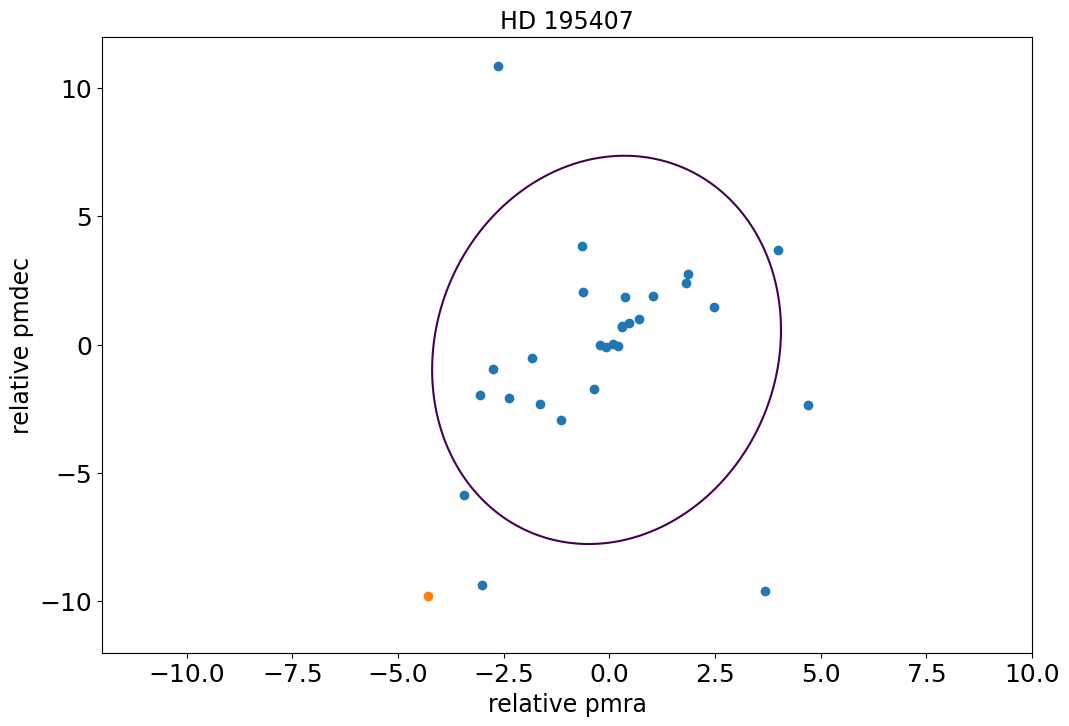

In [18]:
mod = MultivariateNormal()
mod.fit(np.array(proper_motion))
xx, xy = np.meshgrid(*np.linspace(-12, 10, 1000) [np.newaxis,...].repeat(2,0))
x_new = np.array([xx, xy]).transpose((1,2,0)).reshape(-1,2,1)
probs = mod.prob(x_new)
print('fitting star', name[n])
plt.figure(figsize=[12,8])
cs = plt.contour(xx, xy, probs.reshape(1000, 1000), levels = [0.003, 0.05])
plt.scatter(*np.array(proper_motion).T)
plt.scatter(*np.array(obj_pm).T)
plt.xlabel('relative pmra', size=17)
plt.ylabel('relative pmdec', size =17)
plt.xticks(size =18)
plt.yticks(size = 18)
plt.title(str(name[n]), size = 17)
#plt.clabel(cs,cs.levels)
#plt.xlim(-5,5)
#plt.ylim(-5,5)
#plt.savefig('prop_motion.png', transparent = True)